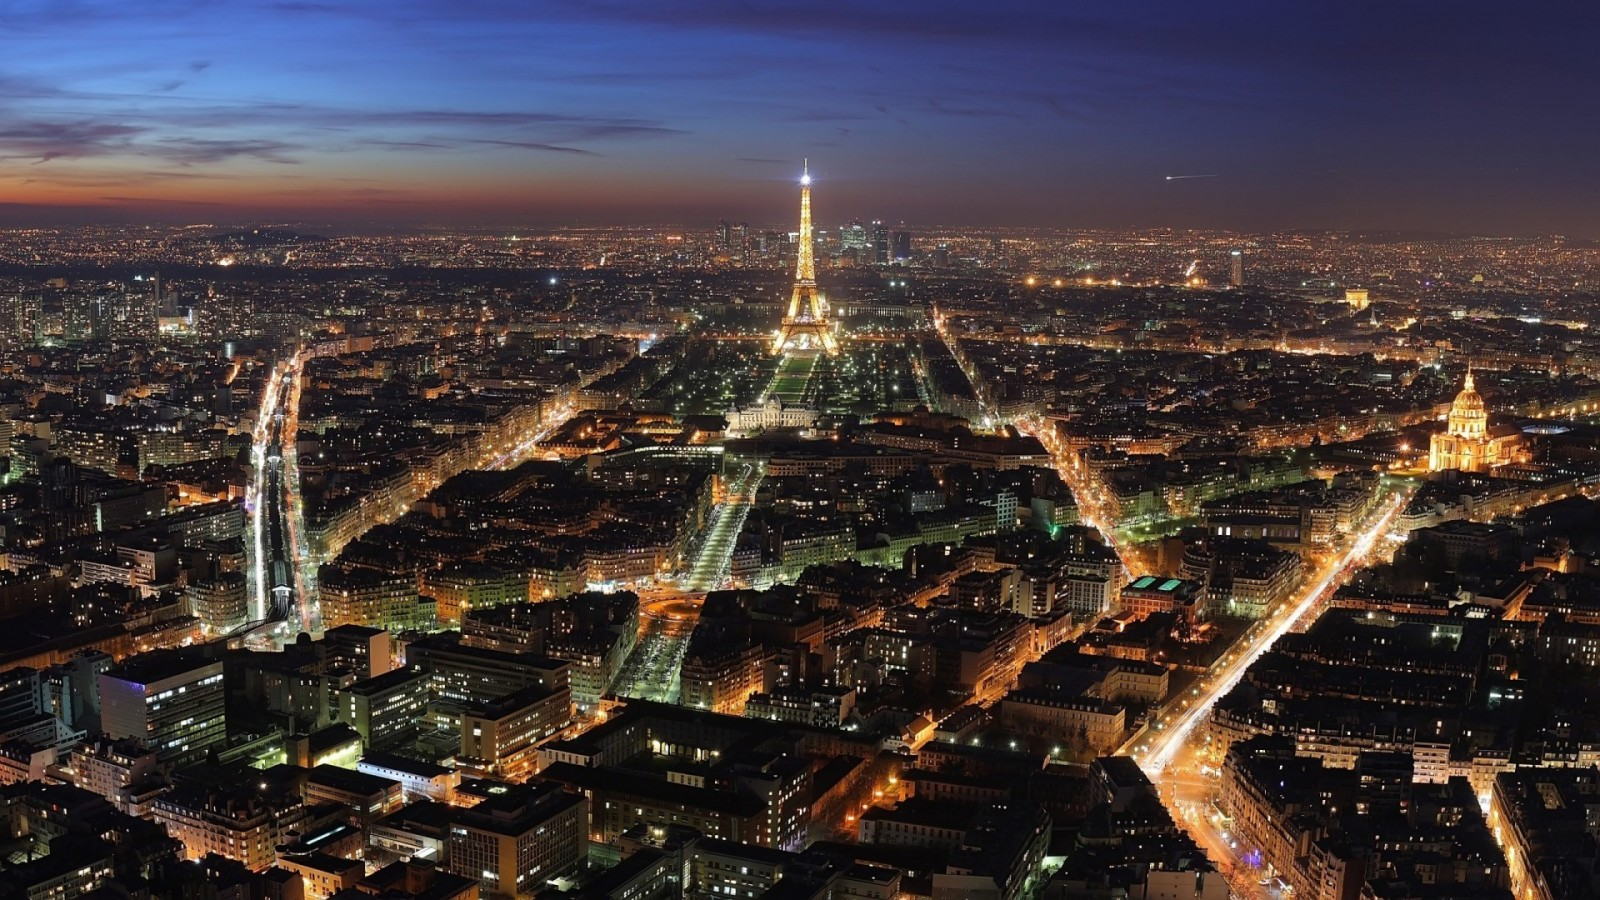

# <center> Property values in Paris 2020</center>

# <center> Part I</center>


## <center> Data Analysis </center>

Living in Paris is a dream for many, however, the price of making a life and living in Paris is quite high.
This work, aims to provide an  intoduction into the lastest property values in the city of lights.
Our journey will start by setting up the basic libraries for data processing in Python, and will unfold into a data cleaning and transforming.

Let's start by importing our data processing libraries:


In [366]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as ptl
import seaborn as sns
%matplotlib inline

ptl.style.use('seaborn')

ptl.rcParams["figure.figsize"]=20,20

We will import the official cadastral raw data published on [Cadastre Data](https://cadastre.data.gouv.fr/datasets)

In [367]:
path = os.getcwd()
rdata = pd.read_csv(os.path.join(path, "full.csv"))

/home/miguel/miniconda3/envs/pyannote/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (10,12,17,18,20,22,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Here, we take a look into our dataset and analyze the structure;

In [368]:
rdata.head()

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,...,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude
0,2020-1,2020-01-07,1,Vente,8000.0,NaN,NaN,FORTUNAT,B063,1250.0,...,NaN,NaN,NaN,T,terres,NaN,NaN,1061.0,5.323522,46.171899
1,2020-2,2020-01-07,1,Vente,75000.0,NaN,NaN,RUE DE LA CHARTREUSE,0064,1960.0,...,NaN,NaN,NaN,AB,terrains a bâtir,NaN,NaN,610.0,5.226197,46.184538
2,2020-3,2020-01-14,1,Vente,89000.0,NaN,NaN,VACAGNOLE,B112,1340.0,...,NaN,NaN,NaN,AB,terrains a bâtir,NaN,NaN,600.0,NaN,NaN
3,2020-3,2020-01-14,1,Vente,89000.0,NaN,NaN,VACAGNOLE,B112,1340.0,...,NaN,NaN,NaN,AB,terrains a bâtir,NaN,NaN,491.0,NaN,NaN
4,2020-4,2020-01-22,1,Vente,209950.0,11.0,NaN,RUE REYER,3340,1000.0,...,Maison,78.0,5.0,S,sols,NaN,NaN,242.0,5.219902,46.196484


In [369]:
rdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 827105 entries, 0 to 827104
Data columns (total 40 columns):
id_mutation                     827105 non-null object
date_mutation                   827105 non-null object
numero_disposition              827105 non-null int64
nature_mutation                 827105 non-null object
valeur_fonciere                 817376 non-null float64
adresse_numero                  516417 non-null float64
adresse_suffixe                 37384 non-null object
adresse_nom_voie                817665 non-null object
adresse_code_voie               817720 non-null object
code_postal                     817713 non-null float64
code_commune                    827105 non-null object
nom_commune                     827105 non-null object
code_departement                827105 non-null object
ancien_code_commune             0 non-null float64
ancien_nom_commune              0 non-null float64
id_parcelle                     827105 non-null object
ancien_id_parcel

We realize that our dataset, contains data from all France, however, we want to focus on Paris, so we narrow the zipcodes or "code_postal" to the one in paris, i.e. 75000, creating a new dataframe *df*

In [370]:
# remove all the zipcodes that are not from Paris
ask = (rdata['code_postal'] > 75000) & (rdata['code_postal'] < 76000)
fg = rdata.loc[ask]
del rdata
fg

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,...,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude
739818,2020-328800,2020-01-17,1,Vente,3400000.00,11.0,NaN,AV FERDINAND BUISSON,3520,75016.0,...,Local industriel. commercial ou assimilé,700.0,0.0,NaN,NaN,NaN,NaN,NaN,2.254119,48.835678
739837,2020-328811,2020-01-22,1,Vente,908200.00,30.0,NaN,RUE NUNGESSER ET COLI,6660,75016.0,...,Appartement,78.0,3.0,NaN,NaN,NaN,NaN,NaN,2.251134,48.843030
739880,2020-328839,2020-01-20,1,Vente,600000.00,47.0,NaN,AV FERDINAND BUISSON,3520,75016.0,...,Appartement,70.0,3.0,NaN,NaN,NaN,NaN,NaN,2.251893,48.838447
740172,2020-329019,2020-01-30,1,Vente,509900.00,47.0,NaN,AV FERDINAND BUISSON,3520,75016.0,...,Appartement,18.0,1.0,NaN,NaN,NaN,NaN,NaN,2.251893,48.838447
740264,2020-329078,2020-01-28,1,Vente,775125.00,35.0,NaN,AV FERDINAND BUISSON,3520,75016.0,...,Appartement,77.0,4.0,NaN,NaN,NaN,NaN,NaN,2.252405,48.837783
740275,2020-329085,2020-01-16,1,Vente,550000.00,25.0,NaN,AV FERDINAND BUISSON,3520,75016.0,...,Appartement,67.0,3.0,NaN,NaN,NaN,NaN,NaN,2.252871,48.837354
743008,2020-330628,2020-02-20,1,Vente,350000.00,2.0,NaN,RUE D ORADOUR SUR GLANE,6195,75015.0,...,Dépendance,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2.281274,48.830953
743009,2020-330628,2020-02-20,1,Vente,350000.00,10.0,NaN,RUE D ORADOUR SUR GLANE,6195,75015.0,...,Appartement,35.0,1.0,NaN,NaN,NaN,NaN,NaN,2.281274,48.830953
744048,2020-331226,2020-04-29,1,Vente,24500.00,2.0,NaN,RUE D ORADOUR SUR GLANE,6195,75015.0,...,Dépendance,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2.281274,48.830953
803607,2020-360697,2020-01-02,1,Vente,268800.00,14.0,NaN,RUE DE L ARCADE,0411,75008.0,...,Appartement,24.0,1.0,NaN,NaN,NaN,NaN,NaN,2.323937,48.871607


We want to have a clean dataset, where the values, can actually help us to get insights into the realstate market in Paris. For this, we will remove all the columns that provide little or no insights into our study. First let's take a look at the structure of our data;

In [371]:
fg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23388 entries, 739818 to 827104
Data columns (total 40 columns):
id_mutation                     23388 non-null object
date_mutation                   23388 non-null object
numero_disposition              23388 non-null int64
nature_mutation                 23388 non-null object
valeur_fonciere                 23345 non-null float64
adresse_numero                  23385 non-null float64
adresse_suffixe                 937 non-null object
adresse_nom_voie                23388 non-null object
adresse_code_voie               23388 non-null object
code_postal                     23388 non-null float64
code_commune                    23388 non-null object
nom_commune                     23388 non-null object
code_departement                23388 non-null object
ancien_code_commune             0 non-null float64
ancien_nom_commune              0 non-null float64
id_parcelle                     23388 non-null object
ancien_id_parcelle         

Now, let's get an idea of wha percentage of the data is actually NOT usefull;

In [372]:
fg_nan =fg.isna().sum() /fg.shape[0]
fg_nan

id_mutation                     0.000000
date_mutation                   0.000000
numero_disposition              0.000000
nature_mutation                 0.000000
valeur_fonciere                 0.001839
adresse_numero                  0.000128
adresse_suffixe                 0.959937
adresse_nom_voie                0.000000
adresse_code_voie               0.000000
code_postal                     0.000000
code_commune                    0.000000
nom_commune                     0.000000
code_departement                0.000000
ancien_code_commune             1.000000
ancien_nom_commune              1.000000
id_parcelle                     0.000000
ancien_id_parcelle              1.000000
numero_volume                   0.998589
lot1_numero                     0.094920
lot1_surface_carrez             0.577561
lot2_numero                     0.634984
lot2_surface_carrez             0.891269
lot3_numero                     0.936976
lot3_surface_carrez             0.989781
lot4_numero     

From our previous output, we can see that there several lines, almost completely blank, and at this point, we want to get an idea, about how many attributes can be taken into account to deploy a machine learning alforithm, for this, we will plot our data. So we have a visual representation.

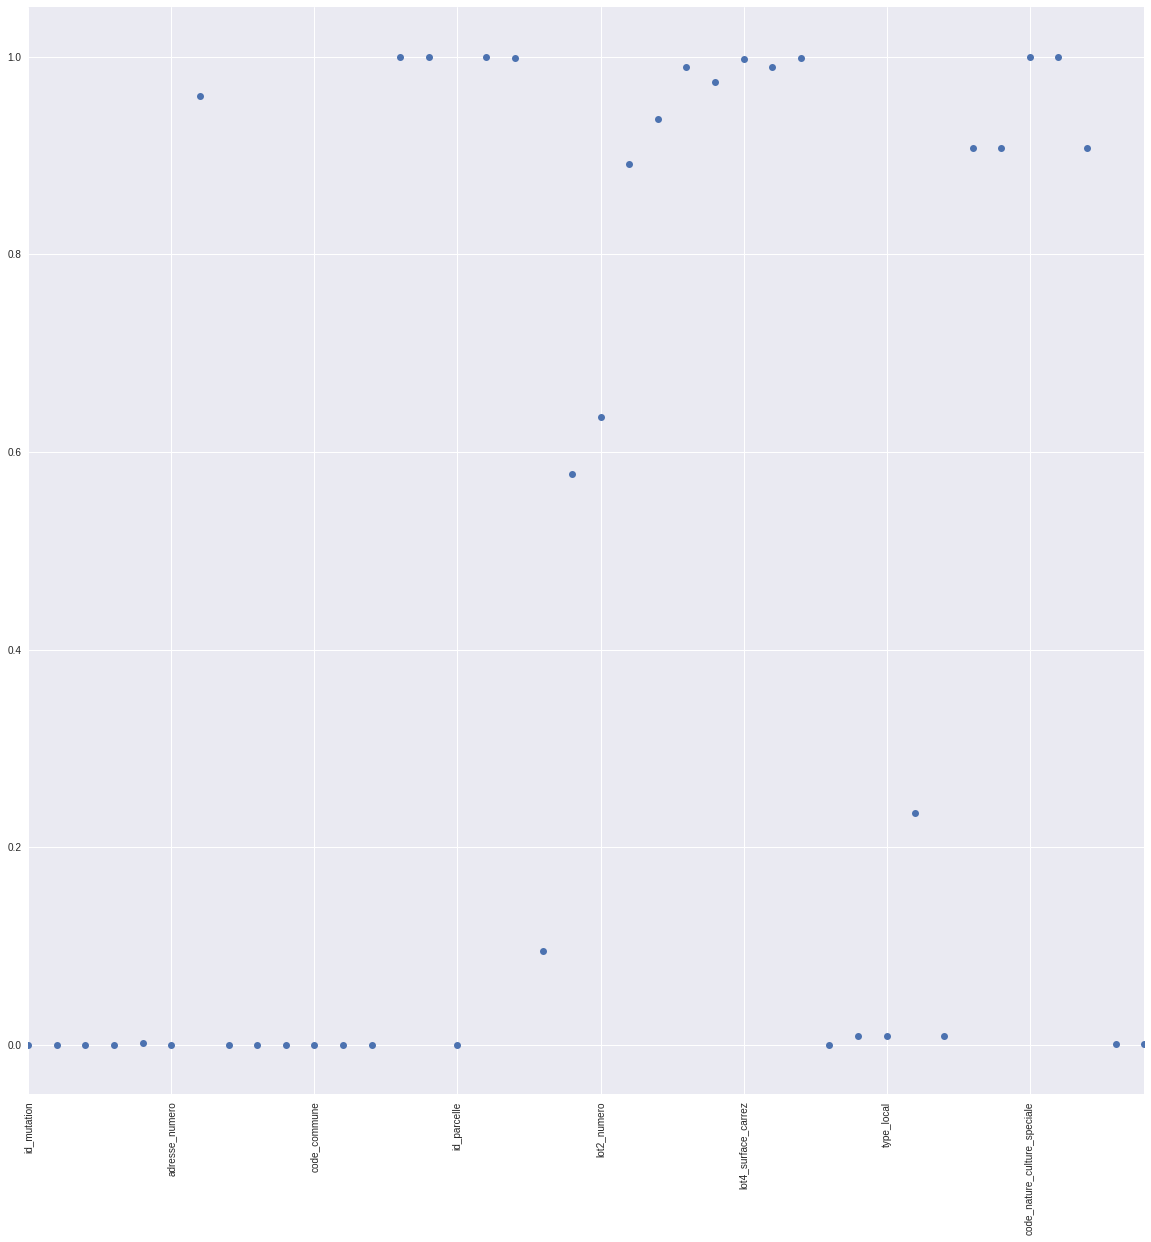

In [373]:
fg_nan.plot(rot=90,style = 'o')
# I want to see the amount of columns with empty values!

as we can see from the figure above, we have several columns or attributes, that are not helpful for our study, those values equal to 1 are empty columns, and we can see, that the center of our plot, contains very few values, that could actually help. 

Hence, we will remove those columns with more than $30 \%$ of the empty values, besides, from closer inpection in our dataset, we can see that the values of *id_parcelle*, *lotx_numero* and *nombre_lots* will be of little meaning for this analysis.

In [374]:
fg_useless = [c for c in fg if (fg[c].isna().sum() /fg.shape[0]) > 0.3]
fg_useless

fg_useless.append('id_parcelle')
fg_useless.append('lot1_numero')
fg_useless.append('nombre_lots')


In [375]:
df= fg.drop(columns=fg_useless, axis=1)
del fg, fg_useless
df.reset_index(drop=True, inplace=True)


In [376]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23388 entries, 0 to 23387
Data columns (total 18 columns):
id_mutation                  23388 non-null object
date_mutation                23388 non-null object
numero_disposition           23388 non-null int64
nature_mutation              23388 non-null object
valeur_fonciere              23345 non-null float64
adresse_numero               23385 non-null float64
adresse_nom_voie             23388 non-null object
adresse_code_voie            23388 non-null object
code_postal                  23388 non-null float64
code_commune                 23388 non-null object
nom_commune                  23388 non-null object
code_departement             23388 non-null object
code_type_local              23187 non-null float64
type_local                   23187 non-null object
surface_reelle_bati          17897 non-null float64
nombre_pieces_principales    23181 non-null float64
longitude                    23358 non-null float64
latitude          

Looking at our dataframe again, we realize that we still have an uneven number of rows. Furthermore, we shoud look if our attributes, are directly related and if must be part of the dataset or not. For this, we need to know, how many unique values exist per attribute, so we can have an idea of any obvious relationship between them.

In [377]:
uniqueValues =df.nunique()
uniqueValues

id_mutation                  16549
date_mutation                  149
numero_disposition               4
nature_mutation                  4
valeur_fonciere               5276
adresse_numero                 340
adresse_nom_voie              2744
adresse_code_voie             2734
code_postal                     20
code_commune                    22
nom_commune                     22
code_departement                 2
code_type_local                  4
type_local                       4
surface_reelle_bati            508
nombre_pieces_principales       13
longitude                    11118
latitude                     10601
dtype: int64

from the table above, we can realize that there are relationships between:
- nom_commune and code_commune 
- code_type_local and to type_local 
- adresse_nom_voie and adresse_nom_voie and adresse_code_voie


Besides, we will convert all strings to lowercase, so we have an homogeneous dataset.



In [378]:
df["nature_mutation"] = df["nature_mutation"].str.lower()
df["adresse_nom_voie"] = df["adresse_nom_voie"].str.lower()
df["nom_commune"] = df["nom_commune"].str.lower()
df["type_local"] = df["type_local"].str.lower()
df

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,adresse_code_voie,code_postal,code_commune,nom_commune,code_departement,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,longitude,latitude
0,2020-328800,2020-01-17,1,vente,3400000.00,11.0,av ferdinand buisson,3520,75016.0,92012,boulogne-billancourt,92,4.0,local industriel. commercial ou assimilé,700.0,0.0,2.254119,48.835678
1,2020-328811,2020-01-22,1,vente,908200.00,30.0,rue nungesser et coli,6660,75016.0,92012,boulogne-billancourt,92,2.0,appartement,78.0,3.0,2.251134,48.843030
2,2020-328839,2020-01-20,1,vente,600000.00,47.0,av ferdinand buisson,3520,75016.0,92012,boulogne-billancourt,92,2.0,appartement,70.0,3.0,2.251893,48.838447
3,2020-329019,2020-01-30,1,vente,509900.00,47.0,av ferdinand buisson,3520,75016.0,92012,boulogne-billancourt,92,2.0,appartement,18.0,1.0,2.251893,48.838447
4,2020-329078,2020-01-28,1,vente,775125.00,35.0,av ferdinand buisson,3520,75016.0,92012,boulogne-billancourt,92,2.0,appartement,77.0,4.0,2.252405,48.837783
5,2020-329085,2020-01-16,1,vente,550000.00,25.0,av ferdinand buisson,3520,75016.0,92012,boulogne-billancourt,92,2.0,appartement,67.0,3.0,2.252871,48.837354
6,2020-330628,2020-02-20,1,vente,350000.00,2.0,rue d oradour sur glane,6195,75015.0,92040,issy-les-moulineaux,92,3.0,dépendance,NaN,0.0,2.281274,48.830953
7,2020-330628,2020-02-20,1,vente,350000.00,10.0,rue d oradour sur glane,6195,75015.0,92040,issy-les-moulineaux,92,2.0,appartement,35.0,1.0,2.281274,48.830953
8,2020-331226,2020-04-29,1,vente,24500.00,2.0,rue d oradour sur glane,6195,75015.0,92040,issy-les-moulineaux,92,3.0,dépendance,NaN,0.0,2.281274,48.830953
9,2020-360697,2020-01-02,1,vente,268800.00,14.0,rue de l arcade,0411,75008.0,75108,paris 8e arrondissement,75,2.0,appartement,24.0,1.0,2.323937,48.871607


We will remove any duplicated rows, keeping only the first occurence;

In [379]:
df = df.drop_duplicates()
df.shape

(21289, 18)

We will take a look if the nature of the transaction is a *direct sell* or any other form of sale. This is important, in order to understand the condition of the properties on the market

In [380]:
df[df['nature_mutation']!='vente']

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,adresse_code_voie,code_postal,code_commune,nom_commune,code_departement,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,longitude,latitude
39,2020-360722,2020-01-09,1,echange,17400000.00,162.0,rue du faubourg saint honore,3518,75008.0,75108,paris 8e arrondissement,75,4.0,local industriel. commercial ou assimilé,387.0,0.0,2.309755,48.873496
40,2020-360722,2020-01-09,1,echange,17400000.00,162.0,rue du faubourg saint honore,3518,75008.0,75108,paris 8e arrondissement,75,4.0,local industriel. commercial ou assimilé,381.0,0.0,2.309755,48.873496
41,2020-360722,2020-01-09,1,echange,17400000.00,162.0,rue du faubourg saint honore,3518,75008.0,75108,paris 8e arrondissement,75,4.0,local industriel. commercial ou assimilé,110.0,0.0,2.309755,48.873496
43,2020-360723,2020-01-09,2,echange,44700000.00,39.0,av pierre 1er de serbie,7471,75008.0,75108,paris 8e arrondissement,75,4.0,local industriel. commercial ou assimilé,219.0,0.0,2.300025,48.868285
44,2020-360723,2020-01-09,2,echange,44700000.00,39.0,av pierre 1er de serbie,7471,75008.0,75108,paris 8e arrondissement,75,4.0,local industriel. commercial ou assimilé,271.0,0.0,2.300025,48.868285
45,2020-360723,2020-01-09,2,echange,44700000.00,39.0,av pierre 1er de serbie,7471,75008.0,75108,paris 8e arrondissement,75,4.0,local industriel. commercial ou assimilé,49.0,0.0,2.300025,48.868285
46,2020-360723,2020-01-09,2,echange,44700000.00,39.0,av pierre 1er de serbie,7471,75008.0,75108,paris 8e arrondissement,75,4.0,local industriel. commercial ou assimilé,278.0,0.0,2.300025,48.868285
47,2020-360723,2020-01-09,2,echange,44700000.00,39.0,av pierre 1er de serbie,7471,75008.0,75108,paris 8e arrondissement,75,4.0,local industriel. commercial ou assimilé,461.0,0.0,2.300025,48.868285
48,2020-360723,2020-01-09,2,echange,44700000.00,39.0,av pierre 1er de serbie,7471,75008.0,75108,paris 8e arrondissement,75,4.0,local industriel. commercial ou assimilé,252.0,0.0,2.300025,48.868285
49,2020-360723,2020-01-09,2,echange,44700000.00,39.0,av pierre 1er de serbie,7471,75008.0,75108,paris 8e arrondissement,75,4.0,local industriel. commercial ou assimilé,265.0,0.0,2.300025,48.868285


We are goin to transform the price type, in order to get values that we can utilize in the future, to perform other operations.

In [381]:
df['valeur_fonciere'].apply(pd.to_numeric)

0        3400000.00
1         908200.00
2         600000.00
3         509900.00
4         775125.00
5         550000.00
6         350000.00
7         350000.00
8          24500.00
9         268800.00
10        878378.00
11        878378.00
12        680000.00
13        852000.00
14        852000.00
16          6000.00
17       2350000.00
18       2350000.00
19        370000.00
20        475000.00
21        741500.00
22          7000.00
23        340000.00
24        800000.00
25        800000.00
26        779637.00
27         89000.00
28        829300.00
29       1300000.00
30        435000.00
            ...    
23358     650251.00
23359     650251.00
23360     650251.00
23361     650251.00
23362     650251.00
23363     650251.00
23364     851300.00
23365      35000.00
23366    1000000.00
23367     268000.00
23368    1500000.00
23369     754885.94
23370     650000.00
23371    1025000.00
23372        100.00
23373        100.00
23374    2203720.00
23375     600000.00
23376     600000.00


In [382]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21289 entries, 0 to 23387
Data columns (total 18 columns):
id_mutation                  21289 non-null object
date_mutation                21289 non-null object
numero_disposition           21289 non-null int64
nature_mutation              21289 non-null object
valeur_fonciere              21261 non-null float64
adresse_numero               21286 non-null float64
adresse_nom_voie             21289 non-null object
adresse_code_voie            21289 non-null object
code_postal                  21289 non-null float64
code_commune                 21289 non-null object
nom_commune                  21289 non-null object
code_departement             21289 non-null object
code_type_local              21158 non-null float64
type_local                   21158 non-null object
surface_reelle_bati          16822 non-null float64
nombre_pieces_principales    21152 non-null float64
longitude                    21261 non-null float64
latitude          

The Zipcodes in paris, are integer values, this will be useful for us, to infer the relationship between the these and the price.

In [383]:
df['code_postal'].astype(int)

0        75016
1        75016
2        75016
3        75016
4        75016
5        75016
6        75015
7        75015
8        75015
9        75008
10       75001
11       75001
12       75003
13       75003
14       75003
16       75008
17       75008
18       75008
19       75003
20       75008
21       75001
22       75003
23       75003
24       75003
25       75003
26       75008
27       75008
28       75008
29       75008
30       75003
         ...  
23358    75002
23359    75002
23360    75002
23361    75002
23362    75002
23363    75002
23364    75004
23365    75004
23366    75004
23367    75004
23368    75004
23369    75004
23370    75002
23371    75004
23372    75004
23373    75004
23374    75002
23375    75004
23376    75004
23377    75004
23378    75004
23379    75004
23380    75004
23381    75002
23382    75002
23383    75002
23384    75002
23385    75004
23386    75002
23387    75002
Name: code_postal, Length: 21289, dtype: int64

In [384]:
df['date_mutation'] = pd.to_datetime(df.date_mutation,
                                          dayfirst=True,
                                          format='%Y/%m/%d').dt.strftime('%d-%m-%Y')
df

/home/miguel/miniconda3/envs/pyannote/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,adresse_code_voie,code_postal,code_commune,nom_commune,code_departement,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,longitude,latitude
0,2020-328800,17-01-2020,1,vente,3400000.00,11.0,av ferdinand buisson,3520,75016.0,92012,boulogne-billancourt,92,4.0,local industriel. commercial ou assimilé,700.0,0.0,2.254119,48.835678
1,2020-328811,22-01-2020,1,vente,908200.00,30.0,rue nungesser et coli,6660,75016.0,92012,boulogne-billancourt,92,2.0,appartement,78.0,3.0,2.251134,48.843030
2,2020-328839,20-01-2020,1,vente,600000.00,47.0,av ferdinand buisson,3520,75016.0,92012,boulogne-billancourt,92,2.0,appartement,70.0,3.0,2.251893,48.838447
3,2020-329019,30-01-2020,1,vente,509900.00,47.0,av ferdinand buisson,3520,75016.0,92012,boulogne-billancourt,92,2.0,appartement,18.0,1.0,2.251893,48.838447
4,2020-329078,28-01-2020,1,vente,775125.00,35.0,av ferdinand buisson,3520,75016.0,92012,boulogne-billancourt,92,2.0,appartement,77.0,4.0,2.252405,48.837783
5,2020-329085,16-01-2020,1,vente,550000.00,25.0,av ferdinand buisson,3520,75016.0,92012,boulogne-billancourt,92,2.0,appartement,67.0,3.0,2.252871,48.837354
6,2020-330628,20-02-2020,1,vente,350000.00,2.0,rue d oradour sur glane,6195,75015.0,92040,issy-les-moulineaux,92,3.0,dépendance,NaN,0.0,2.281274,48.830953
7,2020-330628,20-02-2020,1,vente,350000.00,10.0,rue d oradour sur glane,6195,75015.0,92040,issy-les-moulineaux,92,2.0,appartement,35.0,1.0,2.281274,48.830953
8,2020-331226,29-04-2020,1,vente,24500.00,2.0,rue d oradour sur glane,6195,75015.0,92040,issy-les-moulineaux,92,3.0,dépendance,NaN,0.0,2.281274,48.830953
9,2020-360697,02-01-2020,1,vente,268800.00,14.0,rue de l arcade,0411,75008.0,75108,paris 8e arrondissement,75,2.0,appartement,24.0,1.0,2.323937,48.871607


## A look into the prices

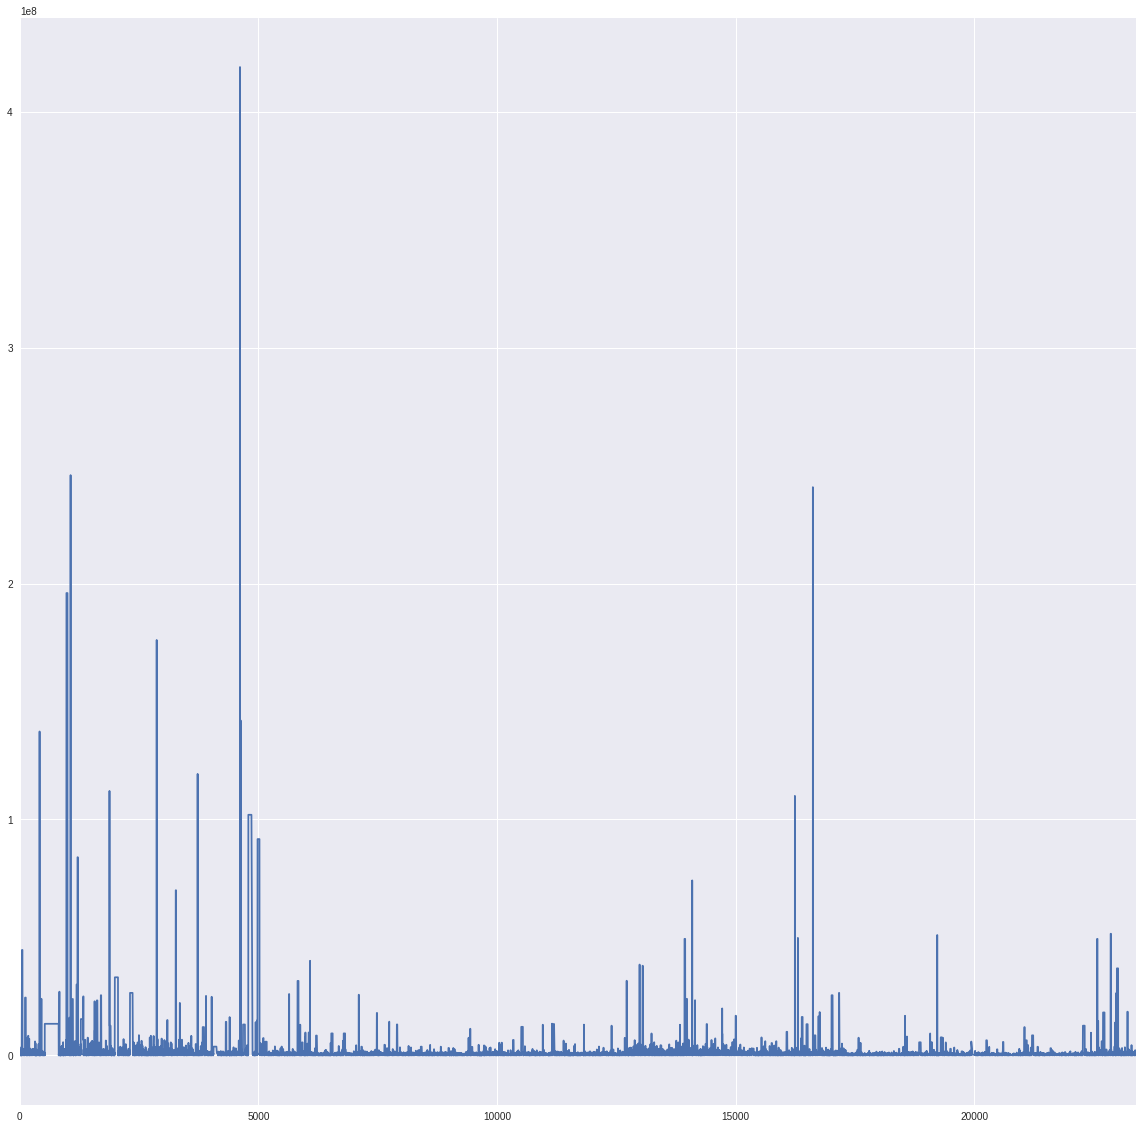

In [341]:
df["valeur_fonciere"].plot()

On the figure above, we realize the presence of several outliers in our property prices, we must take a look at the type of the property and the inherent relationsip with other attributes.

In [342]:
df.head()

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,adresse_code_voie,code_postal,code_commune,nom_commune,code_departement,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,longitude,latitude
0,2020-328800,17-01-2020,1,vente,3400000.0,11.0,av ferdinand buisson,3520,75016.0,92012,boulogne-billancourt,92,4.0,local industriel. commercial ou assimilé,700.0,0.0,2.254119,48.835678
1,2020-328811,22-01-2020,1,vente,908200.0,30.0,rue nungesser et coli,6660,75016.0,92012,boulogne-billancourt,92,2.0,appartement,78.0,3.0,2.251134,48.843030
2,2020-328839,20-01-2020,1,vente,600000.0,47.0,av ferdinand buisson,3520,75016.0,92012,boulogne-billancourt,92,2.0,appartement,70.0,3.0,2.251893,48.838447
3,2020-329019,30-01-2020,1,vente,509900.0,47.0,av ferdinand buisson,3520,75016.0,92012,boulogne-billancourt,92,2.0,appartement,18.0,1.0,2.251893,48.838447
4,2020-329078,28-01-2020,1,vente,775125.0,35.0,av ferdinand buisson,3520,75016.0,92012,boulogne-billancourt,92,2.0,appartement,77.0,4.0,2.252405,48.837783


In [343]:

uniqueValues =df.nunique()
uniqueValues

id_mutation                  16549
date_mutation                  149
numero_disposition               4
nature_mutation                  4
valeur_fonciere               5276
adresse_numero                 340
adresse_nom_voie              2744
adresse_code_voie             2734
code_postal                     20
code_commune                    22
nom_commune                     22
code_departement                 2
code_type_local                  4
type_local                       4
surface_reelle_bati            508
nombre_pieces_principales       13
longitude                    11118
latitude                     10601
dtype: int64

The table above, shows the relatrionship between the type_local and code_type_local. As we can se on row 0 and row 1, these values belong to very different kinds of properties, the classification  is 


|Code_type_local  | type_local|  
|---|---|
|4.0|local industriel. commercial ou assimilé |
|3.0|dépendance	|
|2.0|appartement|
|1.0|maison|



Everything that is not an apartment is classified on the cell code_type_local, with this we can remove buildings and other data that we do not need. So far, we must remove the industrial and dependance values, which might not qualify as a living property.

In [344]:
df = df.drop(df[(df['code_type_local']==3.0) | (df['code_type_local']==4.0)].index)
df

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,adresse_code_voie,code_postal,code_commune,nom_commune,code_departement,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,longitude,latitude
1,2020-328811,22-01-2020,1,vente,908200.0,30.0,rue nungesser et coli,6660,75016.0,92012,boulogne-billancourt,92,2.0,appartement,78.0,3.0,2.251134,48.843030
2,2020-328839,20-01-2020,1,vente,600000.0,47.0,av ferdinand buisson,3520,75016.0,92012,boulogne-billancourt,92,2.0,appartement,70.0,3.0,2.251893,48.838447
3,2020-329019,30-01-2020,1,vente,509900.0,47.0,av ferdinand buisson,3520,75016.0,92012,boulogne-billancourt,92,2.0,appartement,18.0,1.0,2.251893,48.838447
4,2020-329078,28-01-2020,1,vente,775125.0,35.0,av ferdinand buisson,3520,75016.0,92012,boulogne-billancourt,92,2.0,appartement,77.0,4.0,2.252405,48.837783
5,2020-329085,16-01-2020,1,vente,550000.0,25.0,av ferdinand buisson,3520,75016.0,92012,boulogne-billancourt,92,2.0,appartement,67.0,3.0,2.252871,48.837354
7,2020-330628,20-02-2020,1,vente,350000.0,10.0,rue d oradour sur glane,6195,75015.0,92040,issy-les-moulineaux,92,2.0,appartement,35.0,1.0,2.281274,48.830953
9,2020-360697,02-01-2020,1,vente,268800.0,14.0,rue de l arcade,0411,75008.0,75108,paris 8e arrondissement,75,2.0,appartement,24.0,1.0,2.323937,48.871607
10,2020-360698,06-01-2020,1,vente,878378.0,9.0,bd de la madeleine,5888,75001.0,75101,paris 1er arrondissement,75,2.0,appartement,66.0,2.0,2.326882,48.869331
12,2020-360699,10-01-2020,1,vente,680000.0,10.0,rue du bourg l abbe,1200,75003.0,75103,paris 3e arrondissement,75,2.0,appartement,51.0,2.0,2.351965,48.864157
13,2020-360700,03-01-2020,1,vente,852000.0,24.0,rue de saintonge,8716,75003.0,75103,paris 3e arrondissement,75,2.0,appartement,19.0,1.0,2.363196,48.862017


Now, we still need to remove properties like parkings or storage spaces that are for sale in Paris and focus only on the living spaces. 
For this, we need to search, what are the main requirements that a property must fulfill to be a living area.

Excluding parking spaces. In Paris, parking spaces have a relatively small price, compared to studios or apartments, but many times, they can reach the price of a studio.

According to [https://www.lesechos.fr](https://www.lesechos.fr/patrimoine/placement/immobilier-les-prix-des-parkings-parisiens-vont-ils-flamber-1258395), the mean price of a parking in Paris is $35.000$ Euros.

For a property to qualify as a living area,  the [French government](https://www.service-public.fr/particuliers/vosdroits/F34905) stablished a minimum legal living surface of 9 $m^2$. And the mean price per $m^2$ in paris is of $11,404$ according to one of the main agencies in charge of renting and selling flats in Paris [seloger](https://www.seloger.com/prix-de-l-immo/vente/ile-de-france/paris.htm)

We will focus on removing prices for surfaces with a smaller prices than any living area. If the reader wishes to delete parking prices directly, this can be done with the following command

$$df = df.drop(df[(df['valeur_fonciere']< 35000)].index) $$


Now, let's calculate the price of the smaller living surface in Paris, so we have;


In [345]:
minimum_apt_price=  11404*9
minimum_apt_price

102636

Now, we can remove those prices that do not fit in our dataset.

In [346]:
df = df.drop(df[(df['valeur_fonciere']< minimum_apt_price)].index)

Previously, we realize that there are some prices that are outside our dataset, we will remove everything with a price above or below standard deviation (i.e. outliers).

It is important to notice that, the dataset includes buildings with historic value, which makes
outliers to go higher, for this reason, we will stick to a single standard deviation


In [347]:
df = df[np.abs(df["valeur_fonciere"]-df["valeur_fonciere"].mean())<=(df["valeur_fonciere"].std())]
df

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,adresse_code_voie,code_postal,code_commune,nom_commune,code_departement,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,longitude,latitude
1,2020-328811,22-01-2020,1,vente,908200.0,30.0,rue nungesser et coli,6660,75016.0,92012,boulogne-billancourt,92,2.0,appartement,78.0,3.0,2.251134,48.843030
2,2020-328839,20-01-2020,1,vente,600000.0,47.0,av ferdinand buisson,3520,75016.0,92012,boulogne-billancourt,92,2.0,appartement,70.0,3.0,2.251893,48.838447
3,2020-329019,30-01-2020,1,vente,509900.0,47.0,av ferdinand buisson,3520,75016.0,92012,boulogne-billancourt,92,2.0,appartement,18.0,1.0,2.251893,48.838447
4,2020-329078,28-01-2020,1,vente,775125.0,35.0,av ferdinand buisson,3520,75016.0,92012,boulogne-billancourt,92,2.0,appartement,77.0,4.0,2.252405,48.837783
5,2020-329085,16-01-2020,1,vente,550000.0,25.0,av ferdinand buisson,3520,75016.0,92012,boulogne-billancourt,92,2.0,appartement,67.0,3.0,2.252871,48.837354
7,2020-330628,20-02-2020,1,vente,350000.0,10.0,rue d oradour sur glane,6195,75015.0,92040,issy-les-moulineaux,92,2.0,appartement,35.0,1.0,2.281274,48.830953
9,2020-360697,02-01-2020,1,vente,268800.0,14.0,rue de l arcade,0411,75008.0,75108,paris 8e arrondissement,75,2.0,appartement,24.0,1.0,2.323937,48.871607
10,2020-360698,06-01-2020,1,vente,878378.0,9.0,bd de la madeleine,5888,75001.0,75101,paris 1er arrondissement,75,2.0,appartement,66.0,2.0,2.326882,48.869331
12,2020-360699,10-01-2020,1,vente,680000.0,10.0,rue du bourg l abbe,1200,75003.0,75103,paris 3e arrondissement,75,2.0,appartement,51.0,2.0,2.351965,48.864157
13,2020-360700,03-01-2020,1,vente,852000.0,24.0,rue de saintonge,8716,75003.0,75103,paris 3e arrondissement,75,2.0,appartement,19.0,1.0,2.363196,48.862017


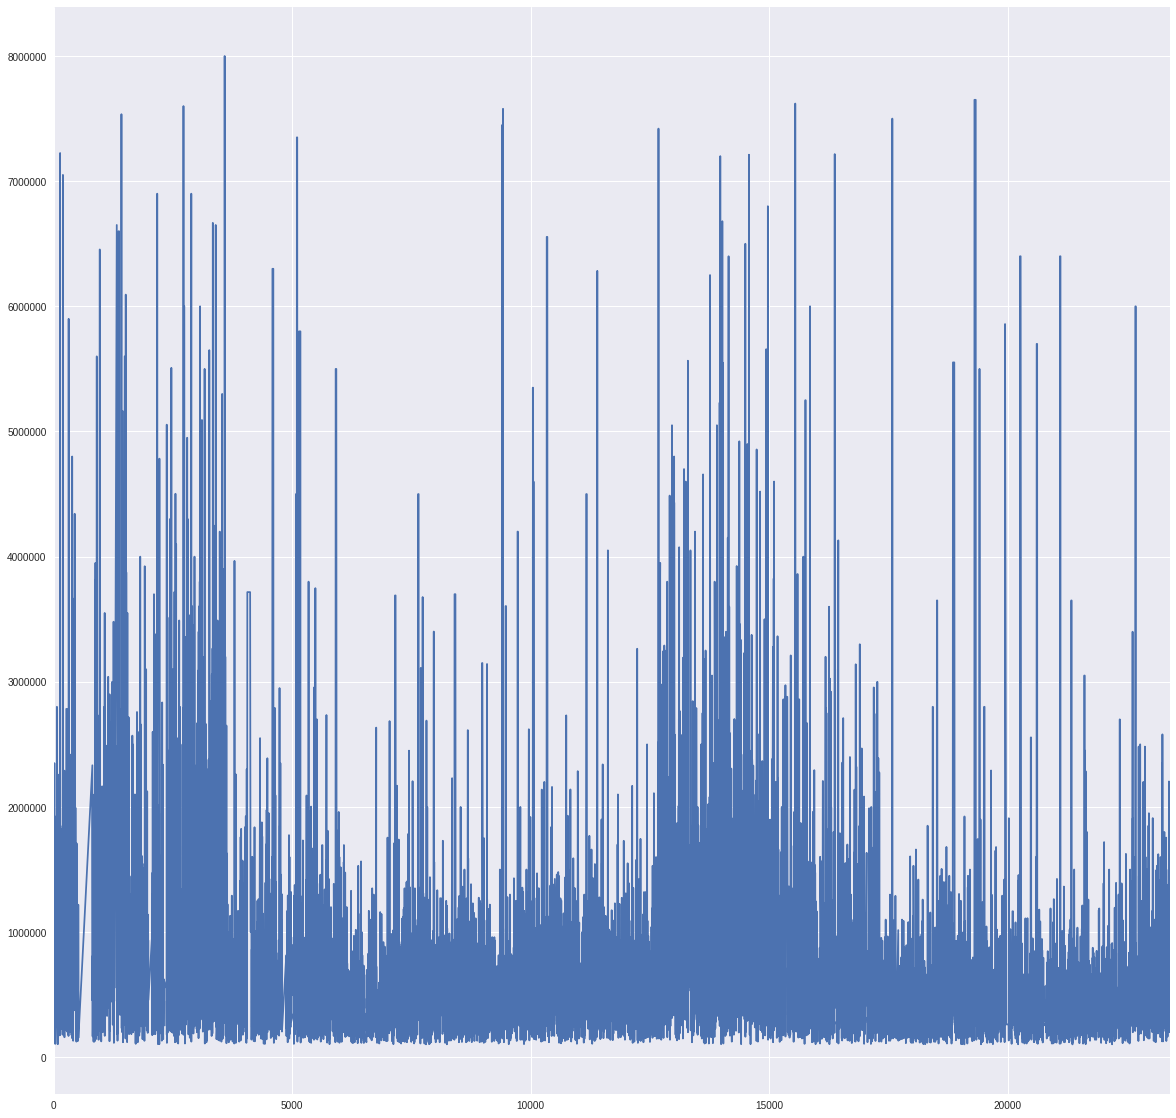

In [348]:
df['valeur_fonciere'].plot()

In the above figure, we realize that we have achived a more cohesive dataset, where the pricing values of the different properties, are not below or equal to zero, nor too far away from our standard deviation.

We still don't have a dataset that can be used to work on machine learning. We still need to understand the relationship between different attributes in our dataset like *numero_disposition* and *nature_mutation'*

In [349]:
df['numero_disposition'].unique()

array([1, 2, 3])

In [350]:
df[df['nature_mutation']!='vente']


,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,adresse_code_voie,code_postal,code_commune,nom_commune,code_departement,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,longitude,latitude
2517,2020-362103,28-01-2020,1,echange,450000.00,116.0,bd raspail,8045,75006.0,75106,paris 6e arrondissement,75,2.0,appartement,100.0,5.0,2.328428,48.844449
3403,2020-362758,04-02-2020,1,adjudication,245000.00,24.0,rue rousselet,8400,75007.0,75107,paris 7e arrondissement,75,2.0,appartement,18.0,1.0,2.318376,48.848383
4207,2020-363315,11-02-2020,1,adjudication,154000.00,3.0,rue du fbg st martin,3522,75010.0,75110,paris 10e arrondissement,75,2.0,appartement,12.0,1.0,2.355399,48.869437
5450,2020-364135,13-05-2020,1,adjudication,530000.00,10.0,rue perdonnet,7252,75010.0,75110,paris 10e arrondissement,75,2.0,appartement,57.0,3.0,2.360243,48.883108
5451,2020-364136,28-05-2020,1,adjudication,355000.00,10.0,rue perdonnet,7252,75010.0,75110,paris 10e arrondissement,75,2.0,appartement,39.0,2.0,2.360243,48.883108
5953,2020-364498,25-06-2020,1,echange,125000.00,29.0,rue la grange aux belles,4293,75010.0,75110,paris 10e arrondissement,75,2.0,appartement,33.0,1.0,2.366251,48.875349
5954,2020-364498,25-06-2020,2,echange,125000.00,29.0,rue la grange aux belles,4293,75010.0,75110,paris 10e arrondissement,75,2.0,appartement,33.0,1.0,2.366251,48.875349
6459,2020-364877,16-01-2020,1,vente en l'état futur d'achèvement,1000000.00,33.0,rue du sergent bauchat,8927,75012.0,75112,paris 12e arrondissement,75,2.0,appartement,60.0,3.0,2.392847,48.845791
7196,2020-365418,28-02-2020,1,vente en l'état futur d'achèvement,2170000.00,44.0,bd richard lenoir,8208,75011.0,75111,paris 11e arrondissement,75,NaN,NaN,NaN,NaN,2.372002,48.858335
7319,2020-365517,26-02-2020,1,vente en l'état futur d'achèvement,990000.00,33.0,rue du sergent bauchat,8927,75012.0,75112,paris 12e arrondissement,75,2.0,appartement,60.0,3.0,2.392847,48.845791


On the table above we realize, the values different from *vente* or sell actually contain misleading information, regarding to the *type of property*, *code*, *number of rooms* and *surface*.

In [351]:
df = df.drop(df[(df.isna().any(axis=1))].index)
df

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,adresse_code_voie,code_postal,code_commune,nom_commune,code_departement,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,longitude,latitude
1,2020-328811,22-01-2020,1,vente,908200.0,30.0,rue nungesser et coli,6660,75016.0,92012,boulogne-billancourt,92,2.0,appartement,78.0,3.0,2.251134,48.843030
2,2020-328839,20-01-2020,1,vente,600000.0,47.0,av ferdinand buisson,3520,75016.0,92012,boulogne-billancourt,92,2.0,appartement,70.0,3.0,2.251893,48.838447
3,2020-329019,30-01-2020,1,vente,509900.0,47.0,av ferdinand buisson,3520,75016.0,92012,boulogne-billancourt,92,2.0,appartement,18.0,1.0,2.251893,48.838447
4,2020-329078,28-01-2020,1,vente,775125.0,35.0,av ferdinand buisson,3520,75016.0,92012,boulogne-billancourt,92,2.0,appartement,77.0,4.0,2.252405,48.837783
5,2020-329085,16-01-2020,1,vente,550000.0,25.0,av ferdinand buisson,3520,75016.0,92012,boulogne-billancourt,92,2.0,appartement,67.0,3.0,2.252871,48.837354
7,2020-330628,20-02-2020,1,vente,350000.0,10.0,rue d oradour sur glane,6195,75015.0,92040,issy-les-moulineaux,92,2.0,appartement,35.0,1.0,2.281274,48.830953
9,2020-360697,02-01-2020,1,vente,268800.0,14.0,rue de l arcade,0411,75008.0,75108,paris 8e arrondissement,75,2.0,appartement,24.0,1.0,2.323937,48.871607
10,2020-360698,06-01-2020,1,vente,878378.0,9.0,bd de la madeleine,5888,75001.0,75101,paris 1er arrondissement,75,2.0,appartement,66.0,2.0,2.326882,48.869331
12,2020-360699,10-01-2020,1,vente,680000.0,10.0,rue du bourg l abbe,1200,75003.0,75103,paris 3e arrondissement,75,2.0,appartement,51.0,2.0,2.351965,48.864157
13,2020-360700,03-01-2020,1,vente,852000.0,24.0,rue de saintonge,8716,75003.0,75103,paris 3e arrondissement,75,2.0,appartement,19.0,1.0,2.363196,48.862017


In [352]:
df[df.isna().any(axis=1)]

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,adresse_code_voie,code_postal,code_commune,nom_commune,code_departement,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,longitude,latitude


As we can see, our datasetm does not contain missing information, only the values that can actually help us to get an overview on what are the attributes that contribute the most on the price of an appartment in Paris. 

Let's take a look to the price information.

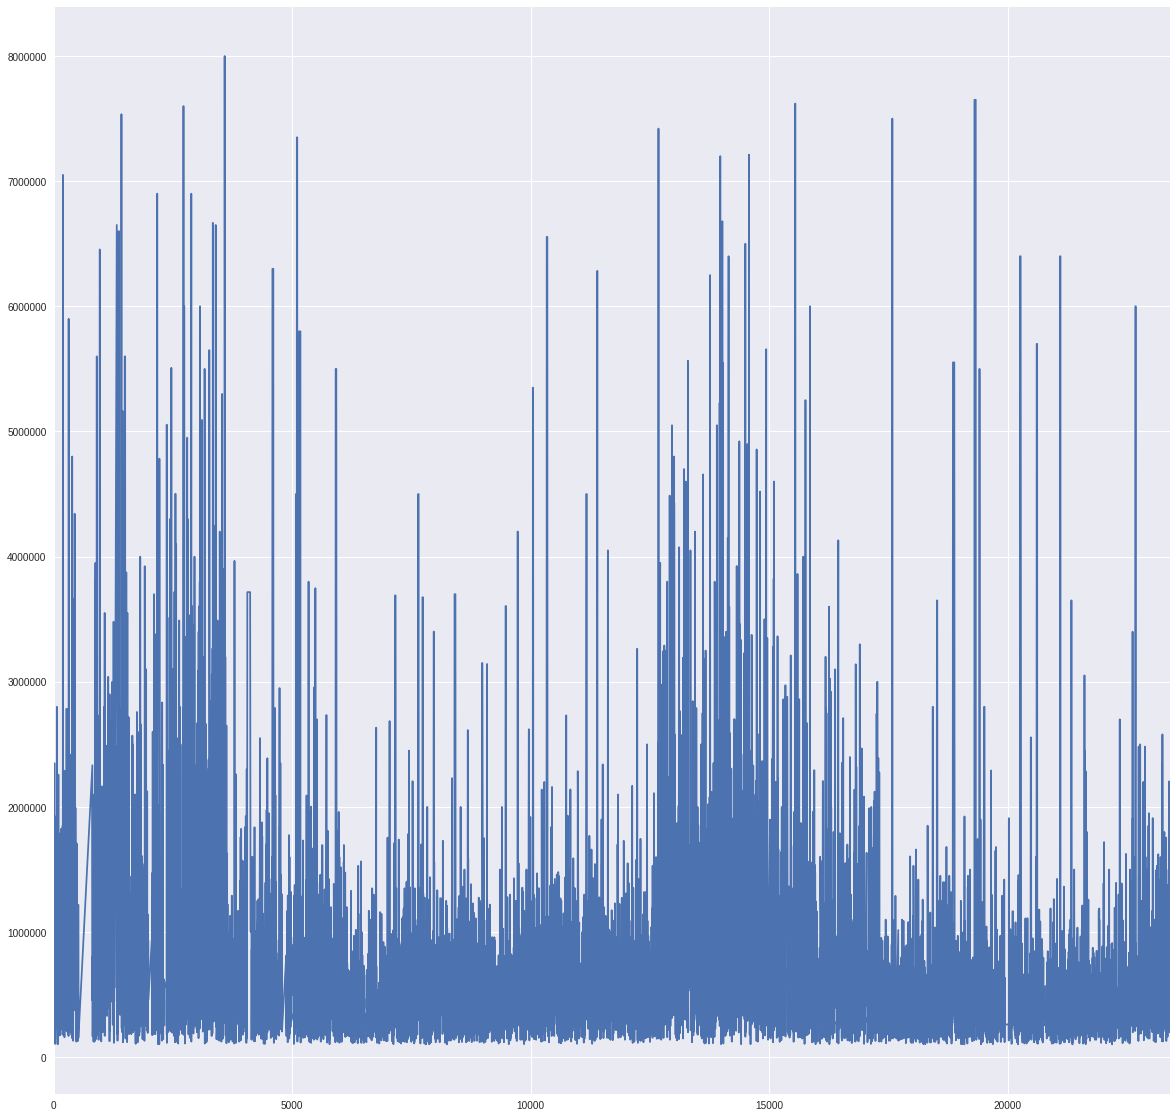

In [353]:
df['valeur_fonciere'].plot()

In [354]:
df.reset_index()



,index,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,adresse_code_voie,code_postal,code_commune,nom_commune,code_departement,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,longitude,latitude
0,1,2020-328811,22-01-2020,1,vente,908200.0,30.0,rue nungesser et coli,6660,75016.0,92012,boulogne-billancourt,92,2.0,appartement,78.0,3.0,2.251134,48.843030
1,2,2020-328839,20-01-2020,1,vente,600000.0,47.0,av ferdinand buisson,3520,75016.0,92012,boulogne-billancourt,92,2.0,appartement,70.0,3.0,2.251893,48.838447
2,3,2020-329019,30-01-2020,1,vente,509900.0,47.0,av ferdinand buisson,3520,75016.0,92012,boulogne-billancourt,92,2.0,appartement,18.0,1.0,2.251893,48.838447
3,4,2020-329078,28-01-2020,1,vente,775125.0,35.0,av ferdinand buisson,3520,75016.0,92012,boulogne-billancourt,92,2.0,appartement,77.0,4.0,2.252405,48.837783
4,5,2020-329085,16-01-2020,1,vente,550000.0,25.0,av ferdinand buisson,3520,75016.0,92012,boulogne-billancourt,92,2.0,appartement,67.0,3.0,2.252871,48.837354
5,7,2020-330628,20-02-2020,1,vente,350000.0,10.0,rue d oradour sur glane,6195,75015.0,92040,issy-les-moulineaux,92,2.0,appartement,35.0,1.0,2.281274,48.830953
6,9,2020-360697,02-01-2020,1,vente,268800.0,14.0,rue de l arcade,0411,75008.0,75108,paris 8e arrondissement,75,2.0,appartement,24.0,1.0,2.323937,48.871607
7,10,2020-360698,06-01-2020,1,vente,878378.0,9.0,bd de la madeleine,5888,75001.0,75101,paris 1er arrondissement,75,2.0,appartement,66.0,2.0,2.326882,48.869331
8,12,2020-360699,10-01-2020,1,vente,680000.0,10.0,rue du bourg l abbe,1200,75003.0,75103,paris 3e arrondissement,75,2.0,appartement,51.0,2.0,2.351965,48.864157
9,13,2020-360700,03-01-2020,1,vente,852000.0,24.0,rue de saintonge,8716,75003.0,75103,paris 3e arrondissement,75,2.0,appartement,19.0,1.0,2.363196,48.862017


In [355]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13597 entries, 1 to 23387
Data columns (total 18 columns):
id_mutation                  13597 non-null object
date_mutation                13597 non-null object
numero_disposition           13597 non-null int64
nature_mutation              13597 non-null object
valeur_fonciere              13597 non-null float64
adresse_numero               13597 non-null float64
adresse_nom_voie             13597 non-null object
adresse_code_voie            13597 non-null object
code_postal                  13597 non-null float64
code_commune                 13597 non-null object
nom_commune                  13597 non-null object
code_departement             13597 non-null object
code_type_local              13597 non-null float64
type_local                   13597 non-null object
surface_reelle_bati          13597 non-null float64
nombre_pieces_principales    13597 non-null float64
longitude                    13597 non-null float64
latitude          

In [356]:
df['valeur_fonciere'].mean()


770443.6407641391

In [357]:
df['valeur_fonciere'].median()

484645.0

In [358]:
df['valeur_fonciere'].min()


103000.0

In [359]:
df['valeur_fonciere'].max()


8000000.0

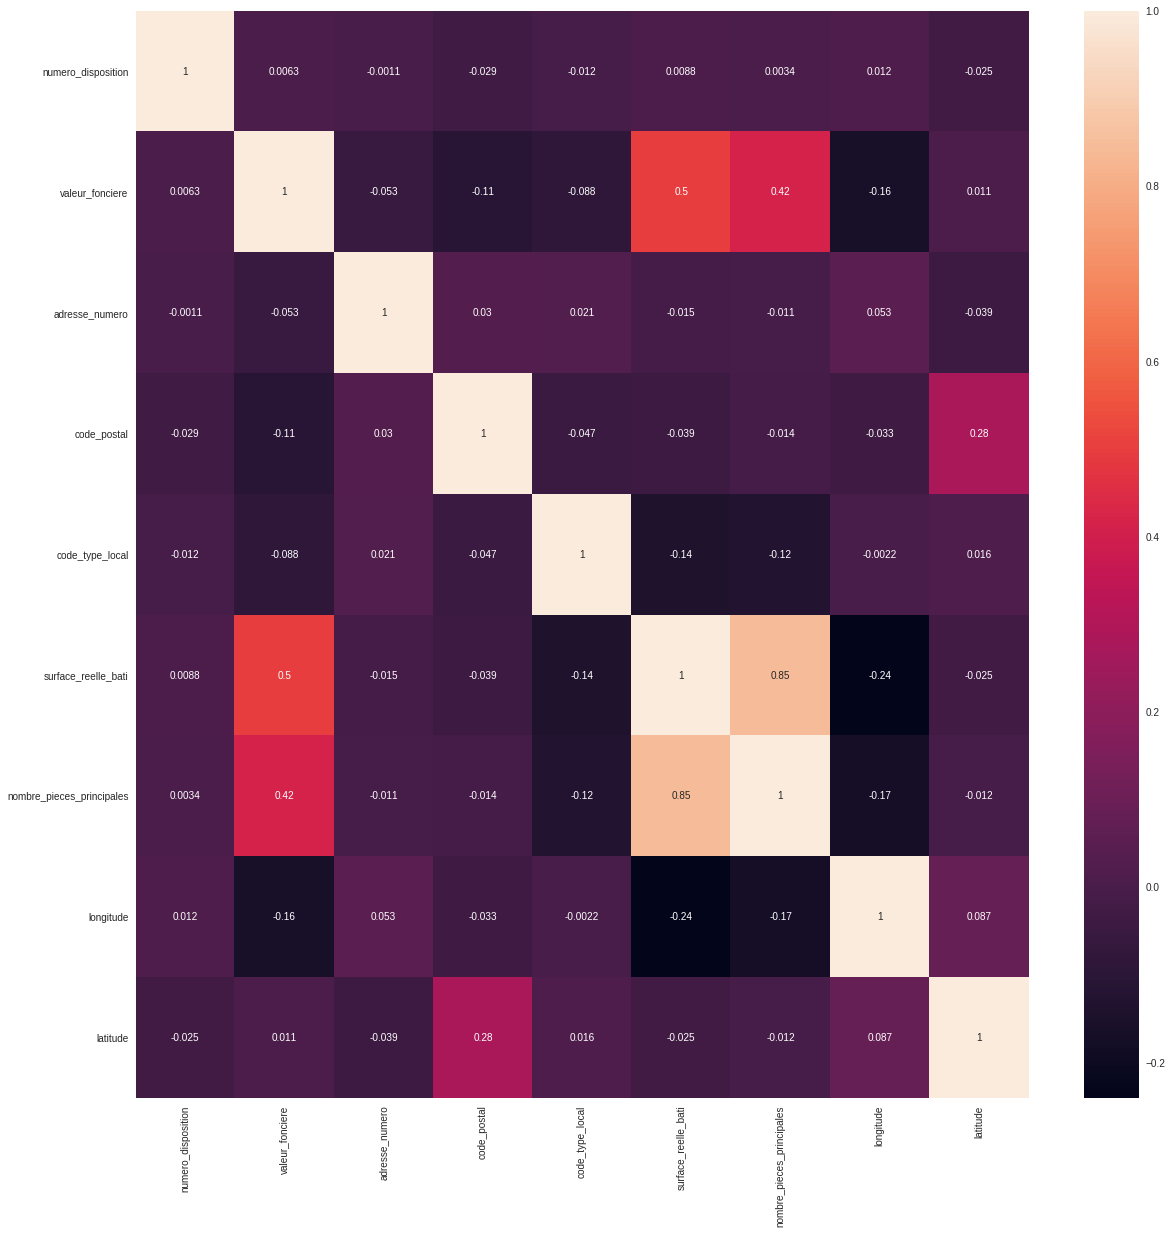

In [360]:
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
ptl.show()


As we can see, on the figure above, our dataset points out a strong correlation between the number of rooms, surface, and price.


# Data Integration

We will integrate other factors like criminality, sustainability and governance. But finding the datasets that can actually be correlated to our data, will be the next challenge.


In [361]:


# crimes in paris

dfcrime = pd.read_csv(os.path.join(path, "crime_paris.csv"))

In [362]:
dfcrime

,libellé index,2020_11,2020_10,2020_09,2020_08,2020_07,2020_06,2020_05,2020_04,2020_03,2020_02,2020_01
0,Règlements de compte entre malfaireurs,0,0,3,0,0,0,0,0,0,0,0
1,Homicides pour voler et à l'occasion de vols,0,0,0,1,0,1,0,0,0,0,0
2,Homicides pour d'autres motifs,3,4,2,1,1,7,0,1,1,2,3
3,Tentatives d'homicides pour voler et à l'occas...,0,3,2,1,1,1,0,0,0,2,1
4,Tentatives homicides pour d'autres motifs,8,18,14,20,13,13,15,12,16,11,15
5,Coups et blessures volontaires suivis de mort,0,0,1,1,0,1,0,0,1,1,1
6,Autres coups et blessures volontaires criminel...,885,961,1069,939,1123,1092,912,509,705,993,1059
7,Prises d'otages à l'occasion de vols,0,0,0,0,0,0,0,0,0,2,0
8,Prises d'otages dans un autre but,1,0,1,0,0,0,1,0,2,0,3
9,Sequestrations,11,16,18,15,21,18,17,8,13,21,15


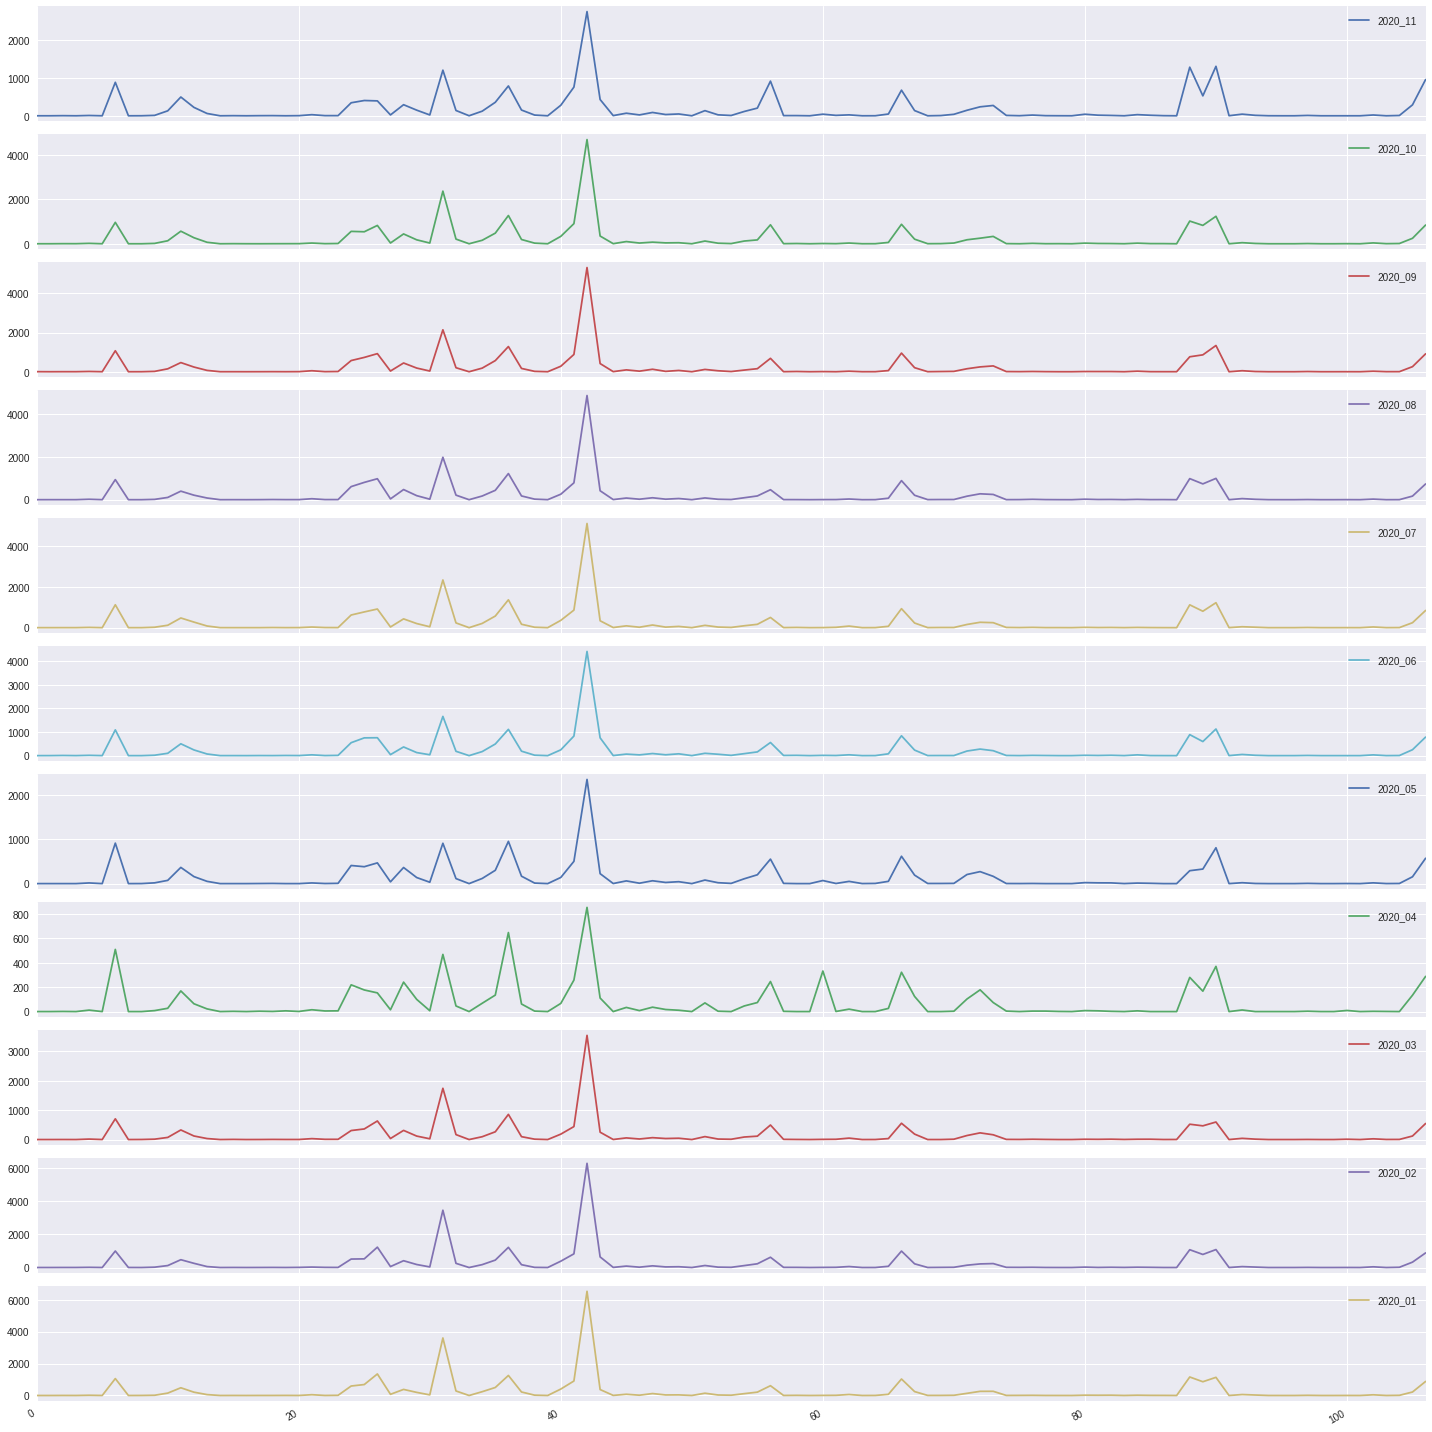

In [363]:

dfcrime.plot(subplots=True)

ptl.tight_layout()
ptl.show()

Above we can take a look at the crime rate in Paris, however, it is not possible to find a direct relationship between the price of the properties and the zipcode or location.